## 🎯 YOLO Pose Estimation Demo

이 노트북에서는 학습된 YOLO Pose 모델을 사용하여
1. 📸 **이미지**에서 포즈 예측
2. 📹 **웹캠**으로 실시간 포즈 예측

---
#### 1️⃣  필요한 라이브러리 임포트

In [ ]:
# YOLO 라이브러리 설치 (최초 1회만 실행)
!pip install ultralytics

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from IPython.display import display, clear_output


print("✅ 라이브러리 로드 완료!")

✅ 라이브러리 로드 완료!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd "/content/drive/MyDrive/2026_AI_Advanced_Study/3차시/03_Hand_Detection/code"

---
#### 2️⃣ YOLO 모델 로드

- 학습한 `모델의 경로`를 입력해 보세요

In [12]:
# 모델 경로 설정
MODEL_PATH = '../weights/pose_full_train_model.pt'
# MODEL_PATH = ''

# 모델 로드
try:
    model = YOLO(MODEL_PATH)
    print(f"✅ 모델 로드 성공: {MODEL_PATH}")
    print(f"📊 모델 정보: {model.info()}")
except Exception as e:
    print(f"❌ 모델 로드 실패: {e}")
    print("💡 모델 경로를 확인해주세요!")

✅ 모델 로드 성공: ../weights/pose_full_train_model.pt
YOLO11n-pose summary: 344 layers, 2,964,066 parameters, 0 gradients, 7.9 GFLOPs
📊 모델 정보: (344, 2964066, 0, 7.928712)


---
#### 📸 Part 1: 이미지에서 포즈 예측

단일 이미지 파일에서 포즈를 감지합니다.

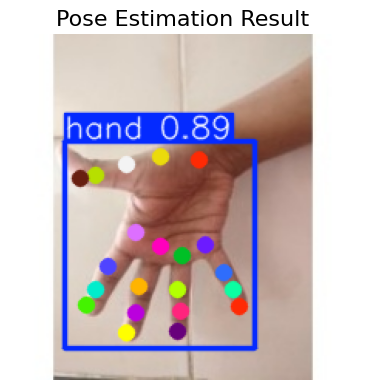

In [ ]:
# 이미지 경로 설정 (본인의 이미지 경로로 변경하세요)
# image_path = '../data/demo/demo_1.jpg'
image_path = ''  # ← 여기에 테스트할 이미지 경로를 입력하세요

# 이미지 예측
if os.path.exists(image_path):
    results = model.predict(source=image_path, conf=0.5, save=False, verbose=False)
    # 결과 시각화
    for result in results:
        
        img_with_pose = result.plot()  # 포즈가 그려진 이미지

        plt.figure(figsize=(4,4))
        plt.imshow(cv2.cvtColor(img_with_pose, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title('Pose Estimation Result', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # 감지된 keypoints 정보 출력
        if result.keypoints is None:
            print("\n❌ 포즈가 감지되지 않았습니다.")      
else:
    print(f"❌ 이미지 파일을 찾을 수 없습니다: {image_path}")
    print("💡 image_path 변수를 올바른 이미지 경로로 설정해주세요!")